Create a Prediction Model for determine the domain of a BPMN model

In [63]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importa la classe Axes3D

# Codice per caricare le stringhe binarie
file_path = "./data/Cleaned data/BPMNcleaned.csv"

try:
    df = pd.read_csv(file_path, sep=',', engine='python', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, sep=',', engine='python', encoding='latin-1')

df

,CollectionName,nTaskNoneLoopNoneCompensateNoneCallNone,nTaskNoneLoopNoneCompensateNoneCall,nTaskNoneLoopNoneCompensateCallNone,nTaskNoneLoopNoneCompensateCall,nTaskNoneLoopStandardCompensateNoneCallNone,nTaskNoneLoopStandardCompensateNoneCall,nTaskNoneLoopStandardCompensateCallNone,nTaskNoneLoopStandardCompensateCall,nTaskNoneLoopMIParallelCompensateNoneCallNone,...,nConversationSubProcess,nConversationCall,nConversationLink,nAssociationUndirected,nAssociationUnidirectional,nAssociationBidirectional,nAssociationDataOutput,nAssociationDataInput,nGroup,nTextAnnotation
0,BIT,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,BIT,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,BIT,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,BIT,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,BIT,59,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22571,eCH,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22572,eCH,5,0,0,0,0,0,0,0,0,...,0,0,0,4,0,0,0,0,0,4
22573,eCH,21,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
22574,eCH,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Adding the Domain for each model

In [64]:
df['Domain'] = None
df.loc[df['CollectionName'] == 'BIT', 'Domain'] = 'Industry'
df.loc[df['CollectionName'] == 'Camunda', 'Domain'] = 'Training Session'
df.loc[df['CollectionName'] == 'BPMAI', 'Domain'] = 'Training Session'
df.loc[df['CollectionName'] == 'eCH', 'Domain'] = 'Public Administration'
df.to_csv("./data/Cleaned data/BPMNcleaned_with_domain.csv", sep=',', index=False, encoding='utf-8')
df

,CollectionName,nTaskNoneLoopNoneCompensateNoneCallNone,nTaskNoneLoopNoneCompensateNoneCall,nTaskNoneLoopNoneCompensateCallNone,nTaskNoneLoopNoneCompensateCall,nTaskNoneLoopStandardCompensateNoneCallNone,nTaskNoneLoopStandardCompensateNoneCall,nTaskNoneLoopStandardCompensateCallNone,nTaskNoneLoopStandardCompensateCall,nTaskNoneLoopMIParallelCompensateNoneCallNone,...,nConversationCall,nConversationLink,nAssociationUndirected,nAssociationUnidirectional,nAssociationBidirectional,nAssociationDataOutput,nAssociationDataInput,nGroup,nTextAnnotation,Domain
0,BIT,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Industry
1,BIT,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Industry
2,BIT,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Industry
3,BIT,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Industry
4,BIT,59,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Industry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22571,eCH,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Public Administration
22572,eCH,5,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,4,Public Administration
22573,eCH,21,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,Public Administration
22574,eCH,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Public Administration



Classification Report:
                       precision    recall  f1-score   support

             Industry       0.99      0.94      0.97       194
Public Administration       1.00      0.28      0.43        29
     Training Session       0.99      1.00      1.00      5421

             accuracy                           0.99      5644
            macro avg       1.00      0.74      0.80      5644
         weighted avg       0.99      0.99      0.99      5644


Confusion Matrix:


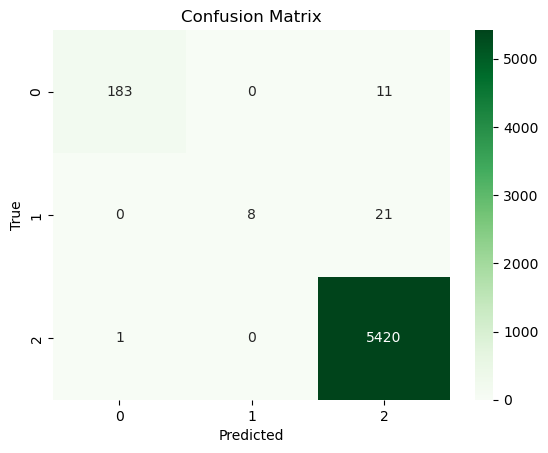

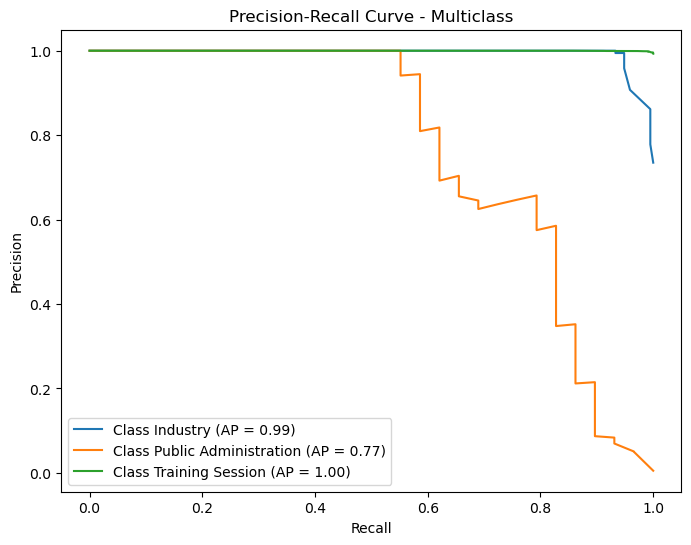

In [135]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Carica il dataset
file_path = "./data/Cleaned data/BPMNcleaned_with_domain.csv"
df = pd.read_csv(file_path, sep=',', engine='python', encoding='utf-8')

if df.shape[1] > 1:
    df = df.drop(columns=df.columns[0])
    
# Prediction considering only the Binary transformation
#df[df > 0] = 1
#binary_strings = df.astype(str).agg(''.join, axis=1).values
#X = np.array([[int(bit) for bit in string] for string in binary_strings])

# Dividi il dataset in set di addestramento e di test
X = df.drop(columns=['Domain'])
y = df['Domain']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Crea e addestra il modello
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Valuta le performance del modello sul set di test
y_pred = model.predict(X_test)

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)
# Get class names from the model
class_names = model.classes_
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('./data/Cleaned data/confusion_matrix.png')
plt.show()

# Converti le etichette in formato binario
y_bin = label_binarize(y_test, classes=model.classes_)

# Addestra il modello OvR e ottieni le probabilità predette
classifier = OneVsRestClassifier(model)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Calcola la curva Precision-Recall per ogni classe
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_bin[:, i], y_score[:, i])

# Plotta le curve Precision-Recall per ogni classe
plt.figure(figsize=(8, 6))
for i in range(len(model.classes_)):
    plt.plot(recall[i], precision[i], label=f'Class {model.classes_[i]} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Multiclass')
plt.legend()
plt.savefig('./data/Cleaned data/Precision-Recall.png')
plt.show()


Classification Report:
                  precision    recall  f1-score   support

        Industry       1.00      1.00      1.00       331
Training Session       1.00      1.00      1.00      1449

        accuracy                           1.00      1780
       macro avg       1.00      1.00      1.00      1780
    weighted avg       1.00      1.00      1.00      1780


Confusion Matrix:


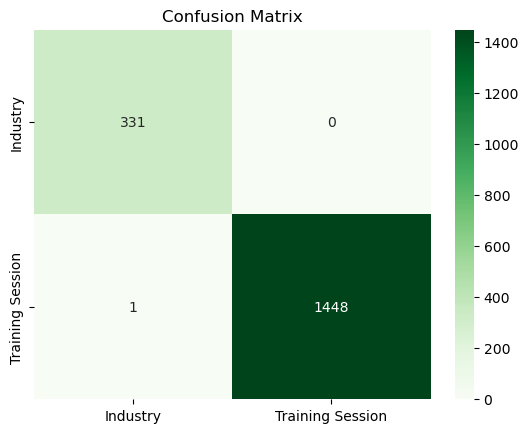

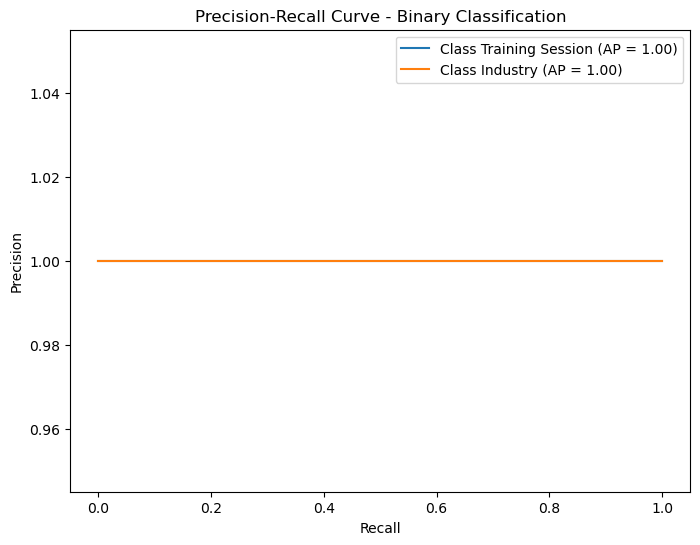

In [136]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Carica il dataset
file_path = "./data/Cleaned data/BPMNcleaned_with_domain.csv"
df = pd.read_csv(file_path, sep=',', engine='python', encoding='utf-8')

filtered_df = df.loc[(df['CollectionName'] == 'BIT') | (df['CollectionName'] == 'Camunda')]

if filtered_df.shape[1] > 1:
    filtered_df = filtered_df.drop(columns=df.columns[0])

# Dividi il dataset in set di addestramento e di test
X = filtered_df.drop(columns=['Domain'])
y = filtered_df['Domain']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Crea e addestra il modello
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Valuta le performance del modello sul set di test
y_pred = model.predict(X_test)

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=y.unique(), yticklabels=y.unique())
plt.title('Confusion Matrix')
plt.savefig('./data/Cleaned data/confusion_matrix2.png')
plt.show()

# Converti le etichette in formato binario
y_bin = label_binarize(y_test, classes=y.unique())

# Addestra il modello OvR e ottieni le probabilità predette
classifier = OneVsRestClassifier(model)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Calcola la curva Precision-Recall per la classe positiva
precision, recall, _ = precision_recall_curve(y_bin, y_score[:, 1])
average_precision = average_precision_score(y_bin, y_score[:, 1])

# Plotta la curva Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Class {y.unique()[1]} (AP = {average_precision:.2f})')
plt.plot(recall, precision, label=f'Class {y.unique()[0]} (AP = {average_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Binary Classification')
plt.legend()
plt.savefig('./data/Cleaned data/Precision-Recall2.png')
plt.show()
